In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import AgglomerativeClustering, MeanShift, DBSCAN
from sklearn.neighbors import kneighbors_graph
import umap
import umap.plot

In [8]:
df = pd.read_excel('C:\\Users\\с\\Downloads\\TCGA.KIRC.sampleMap_HiSeqV2_PANCAN\\HiSeqV2_PANCAN1.xlsx', index_col=0) 

In [10]:
df

,TCGA-BP-4162-01,TCGA-CJ-5677-11,TCGA-DV-5566-01,TCGA-BP-5191-01,TCGA-BP-5200-01,TCGA-BP-4347-01,TCGA-BP-4770-01,TCGA-B0-5696-11,TCGA-BP-4762-01,TCGA-BP-4158-01,...,TCGA-B0-5104-01,TCGA-A3-3313-01,TCGA-B2-5633-01,TCGA-CJ-4872-01,TCGA-CJ-5684-01,TCGA-CJ-4886-01,TCGA-BP-5009-01,TCGA-BP-4969-01,TCGA-CZ-5461-01,TCGA-CW-5587-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.639008,1.032908,0.897208,0.342308,0.197608,0.155308,-1.427592,1.278708,0.051008,0.898108,...,0.694608,-0.308392,0.401208,-0.365892,0.411108,0.088508,0.263308,1.017708,0.330908,0.465408
HIF3A,-0.026426,0.939574,0.229474,-0.548426,-0.222126,2.055474,0.487474,0.424174,-1.774526,1.649174,...,0.651374,-0.729426,-0.386726,3.064774,0.653274,0.756874,1.189874,2.274574,0.624074,0.674574
RNF17,3.272565,-0.531035,-0.531035,-0.531035,-0.531035,-0.192435,-0.531035,-0.531035,-0.531035,-0.531035,...,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,0.081765,-0.531035
RNF10,-0.339672,0.435428,-0.229772,0.566328,-0.262672,-0.371072,0.418728,0.617028,-0.404172,-0.452472,...,-0.043772,-0.006672,-0.280772,0.178528,-0.025772,-0.207772,0.378928,-0.472772,-0.260772,-0.428672
RNF11,0.450122,0.856922,0.351122,-0.626578,0.324422,0.029222,0.925722,0.753822,1.265022,0.331422,...,0.795022,-0.730578,0.495822,0.471222,0.431322,0.525822,0.433622,-0.083678,0.655122,0.579022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTRF,0.894214,0.149914,1.283714,1.223014,1.708514,1.147214,3.544314,-0.181686,2.259514,0.940414,...,1.063314,-0.848486,1.498014,1.548214,1.428514,1.430714,1.672314,0.897914,1.305714,0.660014
BCL6B,2.367573,1.092073,2.873573,0.845873,3.511773,2.960573,1.744373,0.763873,3.086573,2.734473,...,2.450873,1.317173,3.057873,3.338273,2.985173,2.816873,2.721073,2.269573,2.713273,1.501173
GSTK1,0.490905,0.550105,0.711305,1.433905,0.058105,0.460005,-0.244295,0.673805,0.171605,0.999905,...,0.282705,0.060705,-0.747595,0.393705,0.797605,0.212605,0.864405,1.549505,0.418105,0.602105


In [38]:
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.cluster import DBSCAN

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [11]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [12]:
d = df.to_numpy()

In [24]:
d =  d.transpose()

In [25]:
from umap import UMAP
preprocessor = Pipeline(
 [
("scaler", MinMaxScaler()),
("pca", PCA(n_components=2, random_state=42)),
     ]
)

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

clusterer = Pipeline(
 [
 (
 "kmeans",
KMeans(
n_clusters=3,
init="k-means++",
n_init=50,
max_iter=1000,
random_state=42,
  ),
 ),
]
)

In [27]:
pipe = Pipeline(
[
("preprocessor", preprocessor),
("clusterer", clusterer)
  ]
)

In [28]:
pipe.fit(d)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=2, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=1000, n_clusters=3, n_init=50,
                                         random_state=42))]))])

In [29]:
preprocessed_data = pipe["preprocessor"].transform(d)

predicted_labels = pipe["clusterer"]["kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.5200039059492141

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


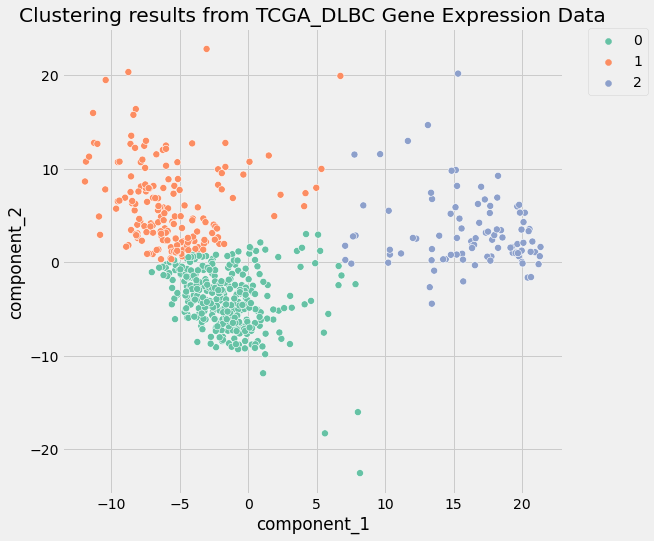

In [30]:
pcadf = pd.DataFrame(
pipe["preprocessor"].transform(d),
columns=["component_1", "component_2"],
)

pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))
scat = sns.scatterplot(
 "component_1",
 "component_2",
s=50,
data=pcadf,
hue="predicted_cluster",
palette="Set2",
)

scat.set_title(
"Clustering results from TCGA_DLBC Gene Expression Data"
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

In [31]:
silhouette_scores = []
for n in range(2, 11):
    pipe["preprocessor"]["pca"].n_components = n
    pipe.fit(d)
    silhouette_coef = silhouette_score(
    pipe["preprocessor"].transform(d),
    pipe["clusterer"]["kmeans"].labels_, )

    silhouette_scores.append(silhouette_coef)


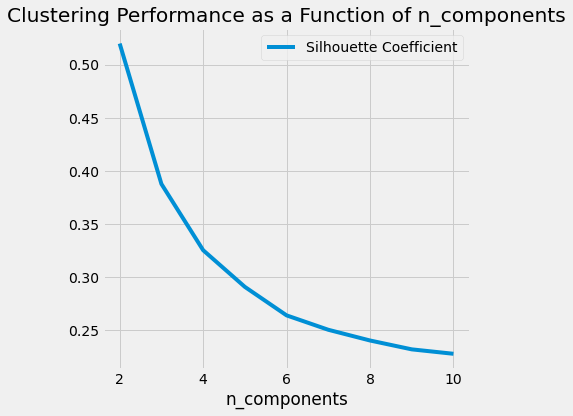

In [32]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(6, 6))
plt.plot(
range(2, 11),
silhouette_scores,
c="#008fd5",
label="Silhouette Coefficient",
)

plt.xlabel("n_components")
plt.legend()
plt.title("Clustering Performance as a Function of n_components")
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


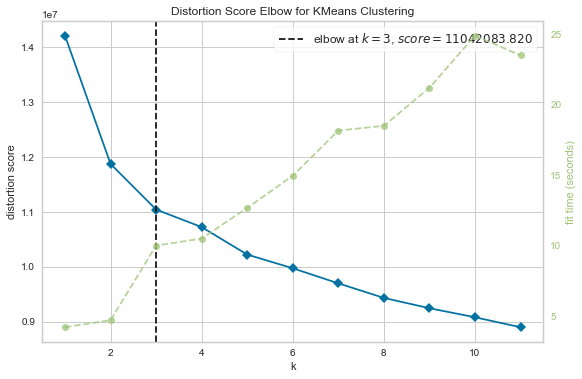

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(d)
visualizer.show()

In [36]:
OMP_NUM_THREADS=3

In [2]:
import numpy

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [5]:
import sklearn.cluster as cluster

In [11]:
d_transposed = df.T

In [12]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(d_transposed)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

In [13]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=50,
).fit_predict(clusterable_embedding)

NameError: name 'hdbscan' is not defined

In [17]:
hdbscan_labels = DBSCAN(min_samples=2).fit_predict(d_transposed)
clustered = (hdbscan_labels >= 0)
plt.scatter(standard_embedding[~clustered, 0],
            standard_embedding[~clustered, 1],
              c=(0.5, 0.5, 0.5),
            s=1,
            alpha=0.5)
plt.scatter(standard_embedding[clustered, 0],
            standard_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=1,
            cmap='Spectral');

TypeError: __init__() got an unexpected keyword argument 'min_cluster_size'

In [19]:
def clustering_agglo(df, n_clusters):
    X = df.to_numpy()
    connectivity = kneighbors_graph(X, int(len(df.index)/10), include_self=False)
    agc = AgglomerativeClustering(linkage='ward',
                                  connectivity=connectivity,
                                  n_clusters=n_clusters)
    agc.fit(X)
    print('Found clusters', len(np.unique(agc.labels_)))
    return agc.labels_
def clustering_dbscan(df, eps, min_samples):
    X = df.to_numpy()
    dbs = DBSCAN(eps=eps, min_samples=min_samples)
    dbs.fit(X)
    print('Found clusters', len(np.unique(dbs.labels_)))
    return dbs.labels_

def clustering_meanshift(df, bandwidth):
    X = df.to_numpy()
    ms = MeanShift(bandwidth=bandwidth, cluster_all=True)
    ms.fit(X)
    print('Found clusters', len(np.unique(ms.labels_)))
    return ms.labels_

labelsDBSCAN = clustering_dbscan(d_transposed, eps=0.25, min_samples=3)
labelsMS = clustering_meanshift(d_transposed, bandwidth=0.6)
labelsAgglo = clustering_agglo(d_transposed, n_clusters=45)

Found clusters 1
Found clusters 606
Found clusters 45


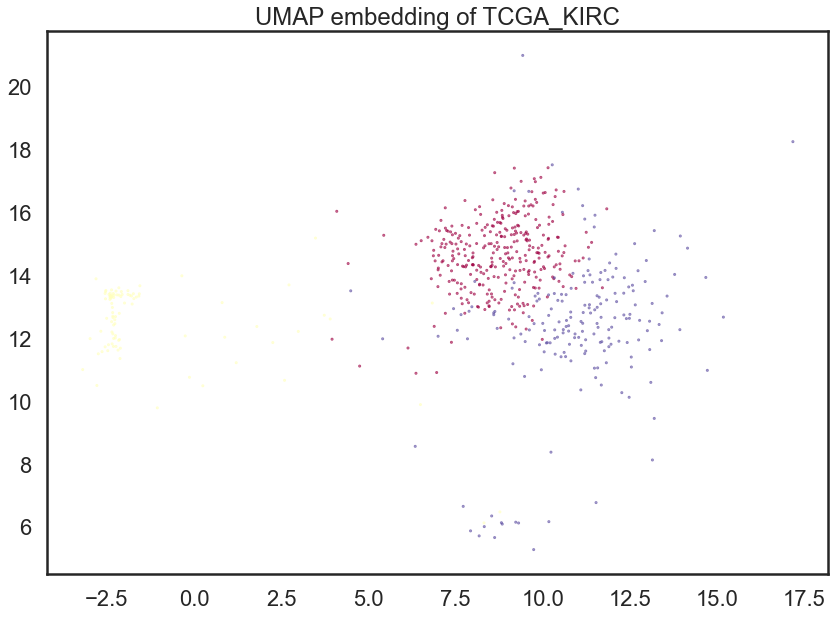

In [49]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
standard_embedding = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.2).fit_transform(d_transposed)
plt.scatter(embedding[:, 0], embedding[:, 1], c = kmeans_labels, cmap='Spectral', alpha=0.7, s = 1)
plt.title('UMAP embedding of TCGA_KIRC');

In [22]:
kmeans_labels = cluster.KMeans(n_clusters=3).fit_predict(d_transposed)

In [35]:
embedding = umap.UMAP(random_state=42, n_neighbors=15, min_dist=0.25, densmap=True).fit_transform(d_transposed)

ValueError: The number of observations cannot be determined on an empty distance matrix.

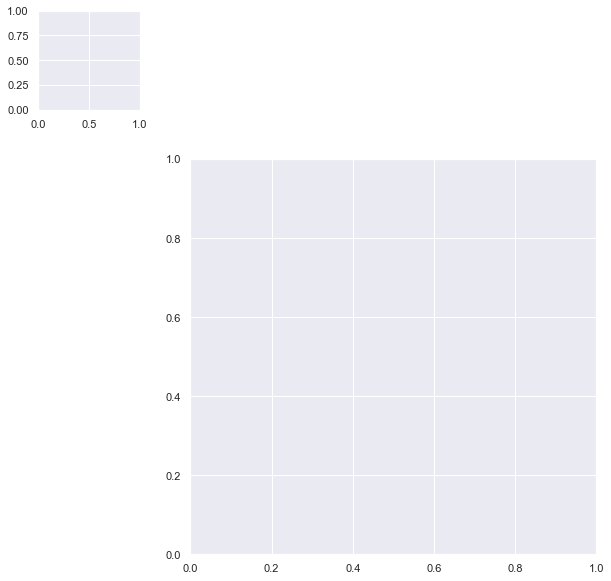

In [42]:
sns.set_theme(color_codes=True)
g = sns.clustermap(data, cmap="ocean", vmin=0, vmax=10)

In [75]:
d_transposed.mean().sort_values()

sample
CEACAM6    -6.137987
AGR2       -5.491440
CEACAM5    -5.206603
PPP1R1B    -5.136997
SERPINB5   -4.814021
              ...   
SLC17A3     8.986289
FXYD2       9.181608
ACSM2A      9.265405
CDH16       9.297468
SLC22A2     9.629962
Length: 20530, dtype: float64

In [78]:
df.mean().sort_values()

TCGA-AK-3447-01   -0.588346
TCGA-CZ-5989-01   -0.559903
TCGA-B4-5832-01   -0.540197
TCGA-AK-3443-01   -0.497717
TCGA-B8-4146-01   -0.416788
                     ...   
TCGA-B0-4819-01    0.338494
TCGA-CJ-4923-01    0.348665
TCGA-BP-4351-01    0.362966
TCGA-BP-4988-01    0.436033
TCGA-CJ-4882-01    0.618484
Length: 606, dtype: float64

In [80]:
t = d_transposed.reindex(d_transposed.mean().sort_values().index, axis=1)

In [112]:
dd = t.transpose()

In [114]:
high = dd.tail(1000)

In [106]:
low = dd.head(1000)

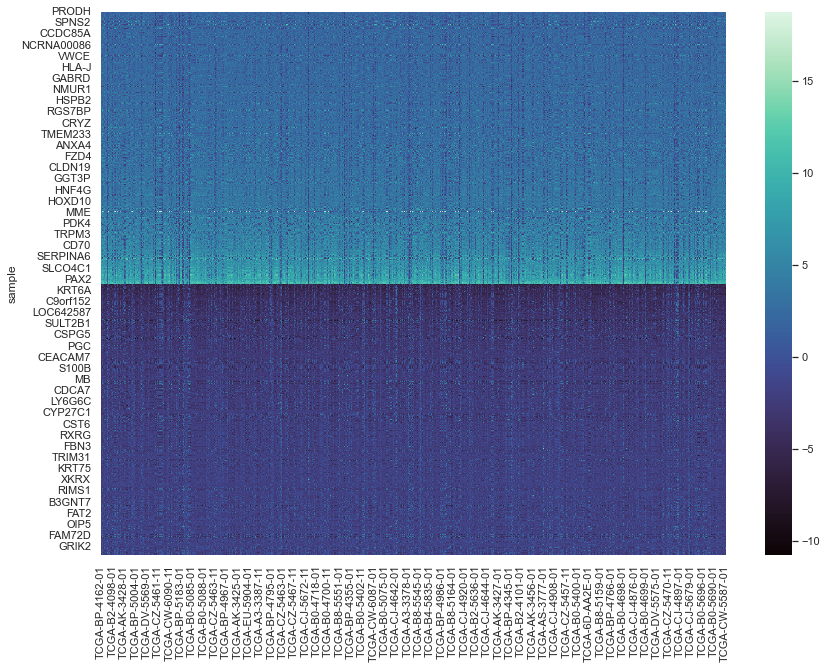

In [130]:
ax = sns.heatmap(pd.concat(degs), cmap="mako")

In [107]:
degs = [high, low]
с = 

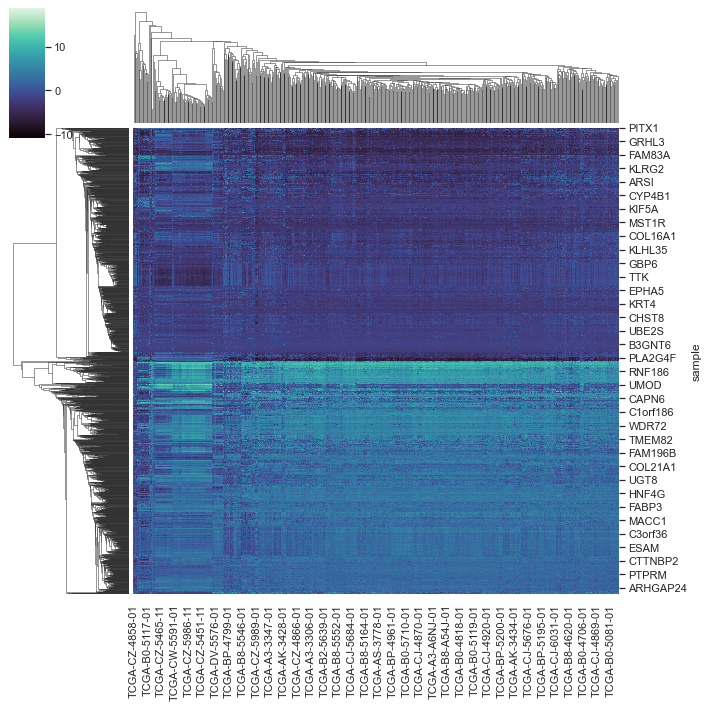

In [109]:
sns.set_theme(color_codes=True)
g = sns.clustermap(pd.concat(degs), cmap="mako")

In [125]:
high.tail(20)
first_column = high.T.head(1).T

In [126]:
first_column.tail(20)

,TCGA-BP-4162-01
sample,
GSTA2,10.233626
UGT1A9,7.320095
ACMSD,8.939920
SLC6A13,10.051264
PAX2,7.810607
AGXT2,10.426883
GLYAT,9.195391
C14orf105,8.978590
UGT2B7,9.472352


In [127]:
mapper = umap.UMAP().fit(d_transposed)

<AxesSubplot:>

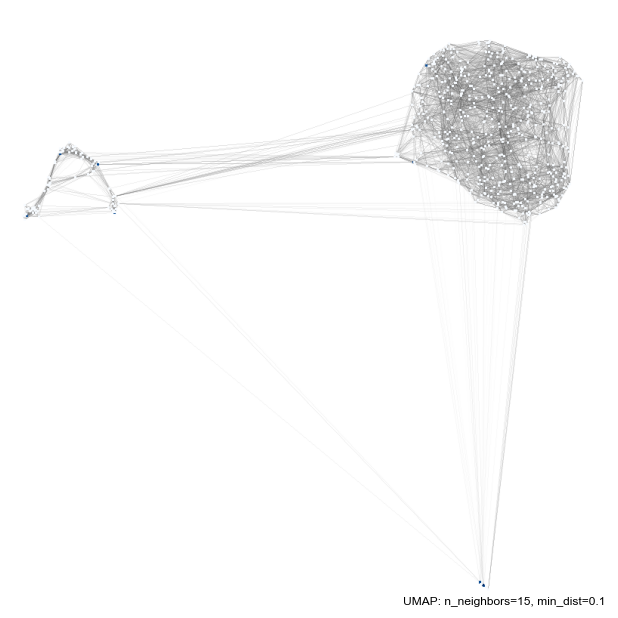

In [128]:
umap.plot.connectivity(mapper, show_points=True)